# Ch2 预备知识

In [1]:
# Getting Started:
import torch
import numpy as np

## $\S2.1$ 数据操作

In [2]:
# 张量对象
x = torch.arange(12)
## 张量的形状：
x.shape
## 张量元素的个数：
x.numel()
y = x.reshape(3, 4)
y = x.reshape(3,-1)
y = x.reshape(-1,4)
y.shape

torch.Size([3, 4])

In [3]:
## 特殊的张量创建：
z1 = np.zeros((2,3,4))
print(z1)

z2 = torch.zeros((2,3,4))
print(z2)

z3 = torch.ones((2,3,4))
print(z3)

### 随机采样：
z4 = torch.randn((2,3,4))
z4

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


tensor([[[-1.5808,  1.0996, -2.2265,  0.3504],
         [ 1.0107, -0.6201,  0.1617,  1.1713],
         [-2.0659,  0.0048,  0.2322,  0.7748]],

        [[ 0.2540, -1.8818,  0.1696, -1.0587],
         [-0.0689,  0.3853, -1.4440, -1.6105],
         [-0.3173, -0.8975,  0.6185,  0.5172]]])

### $\S2.1.2$ 运算符

In [4]:
# 运算符
## element-wise:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
print(x+y, "\n", x-y, "\n", x*y, "\n", x/y, "\n", x**y)
print(torch.exp(x))

tensor([ 3,  4,  6, 10]) 
 tensor([-1,  0,  2,  6]) 
 tensor([ 2,  4,  8, 16]) 
 tensor([0.5000, 1.0000, 2.0000, 4.0000]) 
 tensor([ 1,  4, 16, 64])
tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])


In [5]:
# 张量连接：
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
## 不同的dim代表不同的方向:
torch.concat((X,Y), dim=0), torch.concat((X,Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [6]:
# 通过逻辑运算符构建二元张量：
X == Y

# 对张量的元素求和：
X.sum(dim=0)

tensor([12., 15., 18., 21.])

### $\S2.1.3$ 广播机制
对于两个维数不同的张量，仍然有可能通过广播机制进行相互运算。

In [7]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
print(a, "\n", b)
a+b

c = torch.arange(6).reshape((6,1,1))
d = torch.arange(6).reshape((1,1,6))
print(c, "\n", d)
c+d

tensor([[0],
        [1],
        [2]]) 
 tensor([[0, 1]])
tensor([[[0]],

        [[1]],

        [[2]],

        [[3]],

        [[4]],

        [[5]]]) 
 tensor([[[0, 1, 2, 3, 4, 5]]])


tensor([[[ 0,  1,  2,  3,  4,  5]],

        [[ 1,  2,  3,  4,  5,  6]],

        [[ 2,  3,  4,  5,  6,  7]],

        [[ 3,  4,  5,  6,  7,  8]],

        [[ 4,  5,  6,  7,  8,  9]],

        [[ 5,  6,  7,  8,  9, 10]]])

### $\S2.1.4$ 索引和切片

In [8]:
# 张量的切片:
print(X)
X[-1]
X[1:3]

## 连续索引返回的的是视图:
X[1,2] = 9
print(X)

## 切片返回的是视图:
X[0:2, :] = 12
print(X)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])


### $\S2.1.5$ 内存节省

In [9]:
## 在这个赋值过程中，Y重新指向了新的内存空间:
before = id(Y)
Y = Y + X
id(Y) == before

## 原地修改变量内存的方法——通过切片索引:
Z = torch.zeros_like(Y)
print("id(Z):", id(Z))
Z[:] = X + Y
print("new id(Z):", id(Z))

## 原地修改变量内存的方法——通过特定操作符：
print("id(Y):", id(Y))
Y += X+Y
print("new id(Y):", id(Y))

id(Z): 2138577813040
new id(Z): 2138577813040
id(Y): 2138554423664
new id(Y): 2138554423664


### $\S2.1.6$ 转换为其他Python对象

In [10]:
# 转换为ndarray对象:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

# 转换为Python标量:
a = torch.tensor([3.5])
a, a.item(), int(a), float(a)

(tensor([3.5000]), 3.5, 3, 3.5)

## $\S2.2$ 数据预处理

In [5]:
# 创建并写入一个数据集:
import os
os.makedirs(os.path.join("../", "data"), exist_ok=True)  ## 当文件存在时,exist_ok=True不会raise error

data_file = os.path.join("..", "data", "house_tiny.csv")
with open(data_file, "w") as f:
    f.write("NumRooms,Alley,Price\n")
    f.write("NA,Pave,127500\n")
    f.write("2,NA,106000\n")
    f.write("4,NA,178100\n")
    f.write("NA,NA,140000\n")

In [2]:
# 读取该数据集:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

NameError: name 'data_file' is not defined

### $\S2.2.2$ 缺失值处理

In [ ]:
# 通过插值法处理缺失值:
inputs, outputs = data.iloc[:,0:2], data.iloc[:,2]
inputs = inputs.fillna(inputs.mean(numeric_only=True))  # 会生成一个Series对象

<bound method DataFrame.fillna of    NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN>

In [5]:
import numpy as np
import pandas as pd

In [14]:
# 将文本列转换为两个虚拟变量列:
## 注意第一次运行这个操作会修改get_dummies里的参数:
inputs = pd.get_dummies(inputs, dtype=int)
print(inputs)

   NumRooms  Alley_Pave
0       3.0           1
1       2.0           0
2       4.0           0
3       3.0           0


### $\S2.3.2$ 转换为张量格式

In [15]:
X,y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X,y

(tensor([[3., 1.],
         [2., 0.],
         [4., 0.],
         [3., 0.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## $\S2.3$ 线性代数

### $\S2.3.2$ 向量

### $\S2.3.3$ 矩阵

### $\S2.3.4$ 张量

In [16]:
X = torch.arange(0,24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### $\S2.3.5$ 张量算法的基本性质

In [47]:
# 张量的加法:
A = torch.arange(0,20, dtype=torch.float32).reshape((5,4))
B = A.clone()
A, A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [18]:
# 张量的Hadamard Product (Element-Wise Product):
A * B

tensor([[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121],
        [144, 169, 196, 225],
        [256, 289, 324, 361]])

### $\S2.3.6$ 降维

In [26]:
# 计算元素总和:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()
A.shape, A.sum()

## 可以通过keepdim=True防止降维:
A.sum(axis = 0, keepdims=True)

tensor([[40, 45, 50, 55]])

### $\S2.3.7$ 点积

In [29]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x,y), torch.sum(x*y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.), tensor(6.))

### $\S2.3.8$ 矩阵-向量积

In [51]:
print(A, "\n", x)
A.shape, x.shape, torch.mv(A,x)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]) 
 tensor([0., 1., 2., 3.])


(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### $\S2.3.9$ 矩阵-矩阵乘法

In [54]:
B = torch.ones((4,3))
print(A,"\n", B)
torch.mm(A,B)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### $\S2.3.10$ 范数

In [ ]:
# 范数的计算：默认是计算Euclidean范数(L2范数)
u = torch.tensor([3., 4.])
u.norm()

# L1范数:
torch.abs(u).sum()

## 矩阵的L2范数(Frobenius Norm):
torch.norm(torch.ones((4,9)))

tensor(6.)

## Exercise 2.3

In [ ]:
# 定义(2,3,4)的张量:
X1 = torch.ones((2,3,4))
X2 = torch.ones((3,3,4))
X3 = torch.ones((4,3,4))
len(X1), len(X2), len(X3)

(2, 3, 4, 2)

In [74]:
# 为linalg提供高维张量:
Y1 = torch.ones(4)
Y2 = torch.ones((4,9))
Y3 = torch.ones((4,9,9))
torch.linalg.norm(Y1), torch.linalg.norm(Y2), torch.linalg.norm(Y3)

(tensor(2.), tensor(6.), tensor(18.))

## $\S2.4$ 微积分

### $\S2.4.1$ 导数和微分

In [3]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [4]:
d2l.use_svg_display()

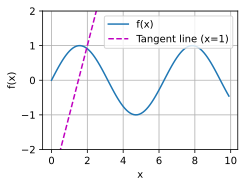

In [20]:
def f(x):
    return np.sin(x)
x = np.arange(0,10,0.1)
d2l.plot(x, [f(x), 2*x-3], "x", "f(x)", ylim=[-2,2], legend=["f(x)", "Tangent line (x=1)"])

### $\S2.4.2$ 偏导数

### $\S2.4.3$ 梯度

### $\S2.4.4$ 链式法则

## $\S2.5$ 自动微分

### $\S2.5.1$ 向量值函数的梯度

In [23]:
# Example:
import numpy as np
import torch

In [9]:
x = torch.arange(4.)
## 需要搭配requires_grad_和backward才能计算出梯度:
x.requires_grad_(True)
y = 2 * torch.dot(x,x)
y.backward()
print(x.grad)
print(x.grad == 4*x)
## 计算梯度，但是每次调用一次都会累计这个梯度
## 将梯度归零:
x.grad.zero_()

tensor([ 0.,  4.,  8., 12.])
tensor([True, True, True, True])


tensor([0., 0., 0., 0.])

### $\S2.5.2$ 值向量函数的梯度

In [ ]:
x.grad.zero_()
print(x)
y = x * x
## 对于值向量函数的梯度，只能求解出雅各比转置矩阵和上游梯度的乘积（只能返回一个列）
### 一维张量会被当作列向量参与运算：
y.backward(torch.ones(len(x)))

tensor([0., 1., 2., 3.], requires_grad=True)


### $\S2.5.3$ 分离计算
有些时候，我们想把反向传播的某个中间变量当成常数看待，这就需要用到分离计算的方法。

In [17]:
# Example:
## 给定一个函数，其中某一个中间变量是常量:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

## 梯度计算:
z.backward(torch.ones(len(x)))
x.grad == u

tensor([True, True, True, True])

### $\S2.5.4$ 控制流下的梯度计算

In [25]:
def f(a:torch.tensor):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [26]:
a = torch.randn(size = (), requires_grad=True)
d = f(a)
d.backward()

In [29]:
print(a,d)
a.grad

tensor(0.3592, requires_grad=True) tensor(1471.2894, grad_fn=<MulBackward0>)


tensor(4096.)

## $\S2.6$ 概率

### $\S2.6.1$ 基本概率论

In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [3]:
fair_probs = torch.ones((6)) / 6
fair_probs
## 抽样统计:
times = 1000000
counts = multinomial.Multinomial(times, fair_probs).sample()
counts / times

tensor([0.1665, 0.1667, 0.1671, 0.1665, 0.1672, 0.1662])

In [23]:
## 统计概率的收敛情况（大数定律）:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print(counts)
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
print(cum_counts.sum(dim=1, keepdims=True))
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates

tensor([[3., 0., 2., 1., 2., 2.],
        [2., 1., 2., 1., 2., 2.],
        [0., 3., 4., 1., 1., 1.],
        ...,
        [0., 5., 2., 1., 2., 0.],
        [3., 2., 1., 2., 0., 2.],
        [2., 3., 2., 1., 2., 0.]])
tensor([[  3.,   0.,   2.,   1.,   2.,   2.],
        [  5.,   1.,   4.,   2.,   4.,   4.],
        [  5.,   4.,   8.,   3.,   5.,   5.],
        ...,
        [871., 787., 816., 824., 838., 844.],
        [874., 789., 817., 826., 838., 846.],
        [876., 792., 819., 827., 840., 846.]])
tensor([[  10.],
        [  20.],
        [  30.],
        [  40.],
        [  50.],
        [  60.],
        [  70.],
        [  80.],
        [  90.],
        [ 100.],
        [ 110.],
        [ 120.],
        [ 130.],
        [ 140.],
        [ 150.],
        [ 160.],
        [ 170.],
        [ 180.],
        [ 190.],
        [ 200.],
        [ 210.],
        [ 220.],
        [ 230.],
        [ 240.],
        [ 250.],
        [ 260.],
        [ 270.],
        [ 280.],
        [ 290.],

tensor([[0.3000, 0.0000, 0.2000, 0.1000, 0.2000, 0.2000],
        [0.2500, 0.0500, 0.2000, 0.1000, 0.2000, 0.2000],
        [0.1667, 0.1333, 0.2667, 0.1000, 0.1667, 0.1667],
        ...,
        [0.1749, 0.1580, 0.1639, 0.1655, 0.1683, 0.1695],
        [0.1752, 0.1581, 0.1637, 0.1655, 0.1679, 0.1695],
        [0.1752, 0.1584, 0.1638, 0.1654, 0.1680, 0.1692]])

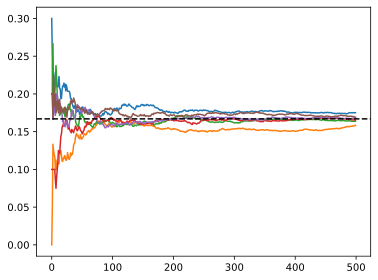

In [24]:
d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                 label=f"P(die={i+1})")
d2l.plt.axhline(y=0.167, color="black", linestyle="dashed")

## $\S2.7$ 文档查看

In [10]:
dir(torch.AVG)
help(torch.AVG)

Help on AggregationType in module torch object:

class AggregationType(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      AggregationType
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(...)
 |      __eq__(self: object, other: object, /) -> bool
 |  
 |  __getstate__(...)
 |      __getstate__(self: object, /) -> int
 |  
 |  __hash__(...)
 |      __hash__(self: object, /) -> int
 |  
 |  __index__(...)
 |      __index__(self: torch._C.AggregationType, /) -> int
 |  
 |  __init__(...)
 |      __init__(self: torch._C.AggregationType, value: typing.SupportsInt) -> None
 |  
 |  __int__(...)
 |      __int__(self: torch._C.AggregationType, /) -> int
 |  
 |  __ne__(...)
 |      __ne__(self: object, other: object, /) -> bool
 |  
 |  __repr__(...)
 |      __repr__(self: object, /) -> str
 |  
 |  __setstate__(...)
 |      __setstate__(self: torch._C.AggregationType, state: typing.SupportsInt, /) -> None
 | 